In [223]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math

Допустим, у нас есть генератор случайных числе из отрезка [0, 1]. Как получить выборку из нового распределения $F$?



### Задача 1
Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.


In [2]:
def transformation(a,x):
    border=a[0]
    i=1;
    while x>border:
        border += a[i]
        i += 1
    return i-1


def random_generation_1(X):
    a=np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
    a=a/sum(a)
    X=[transformation(a,i) for i in X]
    return X
    
def random_generation_2(X):
    a=np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
    a=a/sum(a)
    dict={}
    for i in range(len(a)):
        dict[a[i]]=i
    a[::-1].sort()
    X=[dict[a[transformation(a,i)]] for i in X]
    return X

In [3]:
%%timeit
x = np.random.uniform(low=0, high=1, size=(1000,)) #Но тут полуинтервал [0,1)  =(
x=random_generation_1(x)

1.32 ms ± 79.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [4]:
x = np.random.uniform(low=0, high=1, size=(1000,)) #Но тут полуинтервал [0,1)  =(
x=random_generation_1(x)

C:\Users\Asus\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


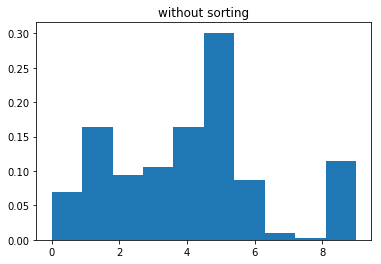

In [5]:
plt.hist(x, normed=True)
plt.title("without sorting")
plt.show()

In [6]:
%%timeit
x = np.random.uniform(low=0, high=1, size=(1000,)) #Но тут полуинтервал [0,1)  =(
x=random_generation_2(x)

1.02 ms ± 81.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [7]:
x = np.random.uniform(low=0, high=1, size=(1000,)) #Но тут полуинтервал [0,1)  =(
x=random_generation_2(x)

C:\Users\Asus\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


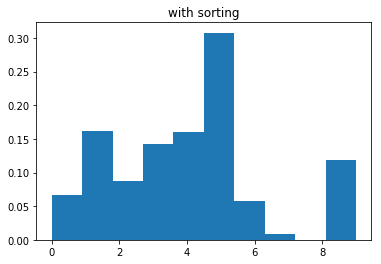

In [8]:
plt.hist(x, normed=True)
plt.title("with sorting")
plt.show()

### Inverse transform method

В следующем предложении заключается идея метода *inverse transform*:

Если $\xi$ имеет равномерное распределение в $[0,1]$, тогда $F^{-1}(\xi)$ распределена по закону $F$. (Для каких $F$ это верно?)

### Задача 2
Смоделируйте выборку размера 1000 из распределения $Exp(\lambda)$. Постройте выборочную гистограмму и точный график плотности распределения.

In [104]:
def f_1(x,a):
    return math.log(1-x)/(-a)

In [127]:
xx = np.random.uniform(low=0,high=1,size=(1000,)) #Но тут полуинтервал [0,1)  =(
xx.sort()
a=3
x=[f_1(i,a) for i in xx]
exps = [a*math.exp(-a*i) for i in x ]

C:\Users\Asus\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


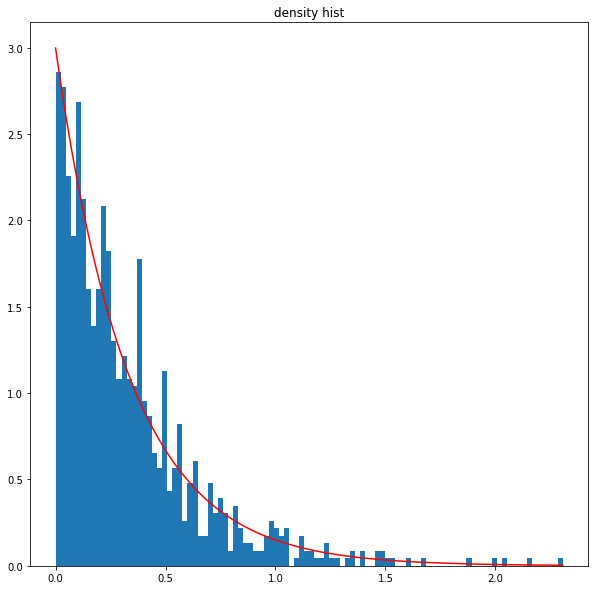

In [128]:
plt.figure(figsize=(10,10))
plt.hist(x, normed=True, bins = 100)
plt.title("density hist")
plt.plot(x,exps,color='red')
plt.show()

### Задача 3
Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

In [154]:
from math import pi
from scipy import stats
import numpy as np
dist = stats.cauchy()
x = np.random.uniform(low=-4,high=4,size=(1000,))
#Будем рандомить числа из квадрата -4 4 0 pi 
y = []
for i in range(1000):
    indx = 0
    while indx == 0:
        dev = np.random.uniform(low=0,high=1/pi)
        if dev<dist.pdf(x[i]):
            indx = 1
            y.append(dev)

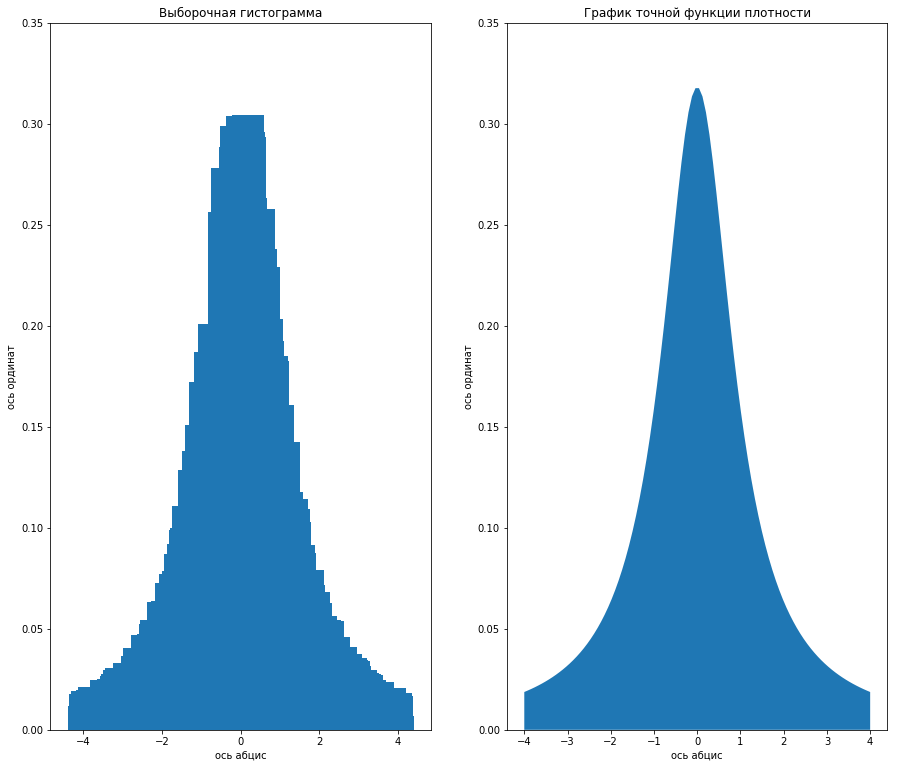

In [171]:
fig = plt.figure(figsize=(15,13))
ax_1 = fig.add_subplot(1, 2, 1)
ax_1.set_ylim([0, 0.35])
ax_1.set_title('Выборочная гистограмма')
ax_1.set_xlabel('ось абцис')
ax_1.set_ylabel('ось ординат')
ax_1 = plt.bar(x,y)

ax_2 = fig.add_subplot(1, 2, 2)
ax_2.set_ylim([0, 0.35])
ax_2.set_title('График точной функции плотности')
ax_2.set_xlabel('ось абцис')
ax_2.set_ylabel('ось ординат')
xx = np.linspace(-4, 4, 100)
ax_2 = plt.fill_between(xx, 0, dist.pdf(xx)) #needs to be normalized!
plt.show()

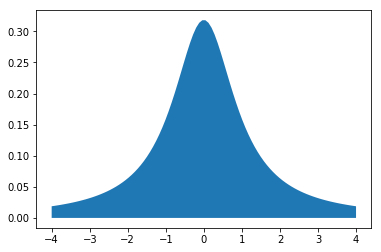

In [13]:
from scipy import stats
import numpy as np
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.fill_between(x, 0, dist.pdf(x)) #needs to be normalized!
plt.show()

In [32]:
x = np.random.uniform(low=-4, high=4, size=(1000,))

C:\Users\Asus\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


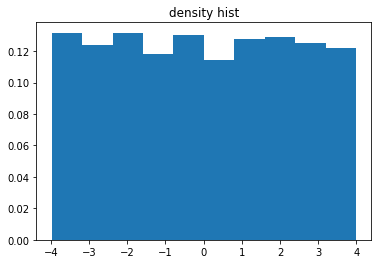

In [37]:
plt.hist(x, normed=True)
plt.title("density hist")
plt.show()

### Задача 4
Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора. 

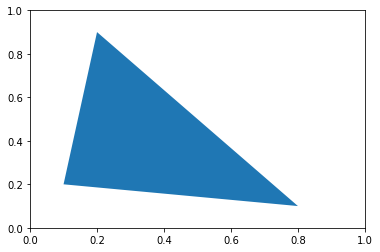

In [187]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

In [188]:
x = np.random.uniform(low=0, high=1,size=(500))
y = np.random.uniform(low=0, high=1,size=(500))
Ax = x[x+y<=1]
Ay = y[x+y<=1]
A = np.array([Ax,Ay])

Bx = x[x+y>1]
By = y[x+y>1]#Эту часть надо наложить на нижнюю поворотом и сдвигом
B = np.array([Bx,By])

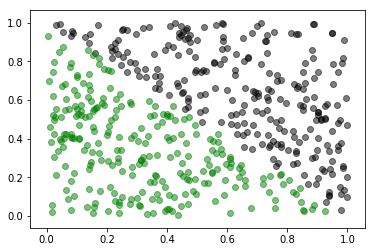

In [189]:
colors = (0,0,0)
plt.scatter(B[0], B[1], c=colors, alpha=0.5)
plt.scatter(A[0], A[1], c="green", alpha=0.5)

In [190]:
cos =math.cos(math.pi)
sin = math.sin(math.pi)
MATR = np.array([[cos,-sin],[sin,cos]])
B = MATR.dot(B)# сделаем поворот на 90 градусов вокруг центра
B = B+1 # Пододвигаем к началу

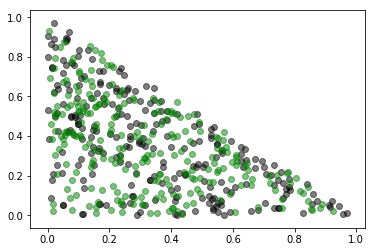

In [191]:
colors = (0,0,0)
plt.scatter(B[0], B[1], c=colors, alpha=0.5)
plt.scatter(A[0], A[1], c="green", alpha=0.5)

In [192]:
A = np.hstack((A,B))##Совместили 

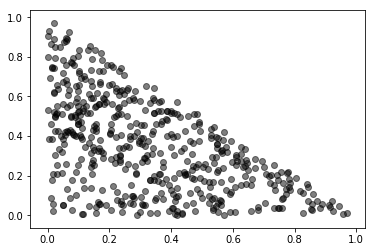

In [193]:
colors = (0,0,0)
plt.scatter(A[0], A[1], c=colors, alpha=0.5)
#Получили равномерное распределение в треугольнике

In [194]:
#Приеведём наш треугольник к нужному: подгоним длину сторон, повернём и переместим на нужную точку
A = A*math.sqrt(50)/10 #длины сторон
cos =7/math.sqrt(50)
sin = -1/math.sqrt(50)
MATR = np.array([[cos,-sin],[sin,cos]])
A = MATR.dot(A)
A[0] = A[0]+0.1
A[1] = A[1]+0.2#Сдвинем в нужную точку

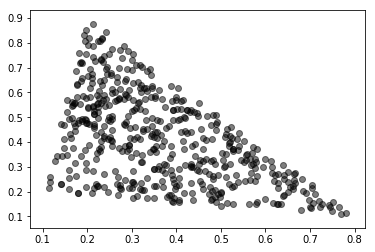

In [196]:
colors = (0,0,0)
plt.scatter(A[0], A[1], c=colors, alpha=0.5)

### Получили искомое распределение!

### Задача 5
Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

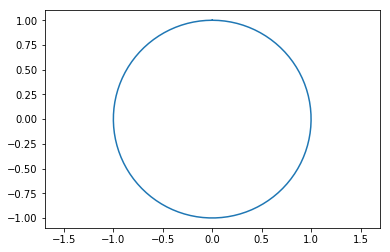

In [66]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

Так как количество точек должно *линейно* возрастать при увеличении расстояния от центра, то можно сказать, что радиус должен быть распределён с плотностью 2x где $x\in[0,1]$ иначе 0 (чтобы интеграл к единице сходился).Чтобы получить такое линейне распределений с очевидной функцией распределения $ x^2 $ , нужно взять *равномерное* и извлечь из него корень $F(\xi)=\sqrt\xi$ где $\xi$-равномерно распределена( Inverse transform method)

In [71]:
r = np.random.uniform(low=0, high=1,size=(500))
r = np.sqrt(r)
phi = np.random.uniform(low=0, high=1,size=(500))*2*math.pi

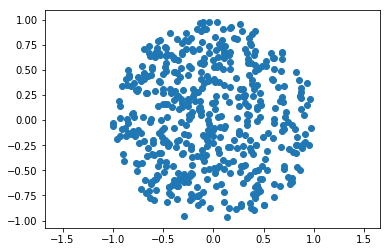

In [75]:
plt.scatter(r*np.sin(phi), r*np.cos(phi))
plt.axis('equal')
plt.show()

## Вот и всё!!!

### Задача 6
Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

In [252]:
##Мы повернём оси(!) на 45 градусов, таким образом нам нужно будет делать сдвиг и по вертикали и по горизонтали одновременно
## 100 раз.Этим способом мы избавимся от зависимости движения по осям!
start = np.array([0,0])
end = [0,0]
direction_path = -np.ones((2,100))
way=[]
n = 100 # Чётное

x_num = np.random.choice(n,int(n/2),replace=False) ##Выбрали места для движения вперёд по осям
y_num = np.random.choice(n,int(n/2),replace=False)

direction_path[0][x_num] = 1
direction_path[1][y_num] = 1 ##Получили схему пути

way.append(start)
for i in range(n):
    dev=np.array([direction_path[0][i],direction_path[1][i]])
    way.append(np.array(way[-1])+dev)
## Осталось повернуть нашу картину на 45 градусов по часовой стрелке
t = 1/np.sqrt(2)
Matr=np.array([[t,t],[-t,t]])
way = Matr.dot(np.array(way).T)*t  #Нормировали

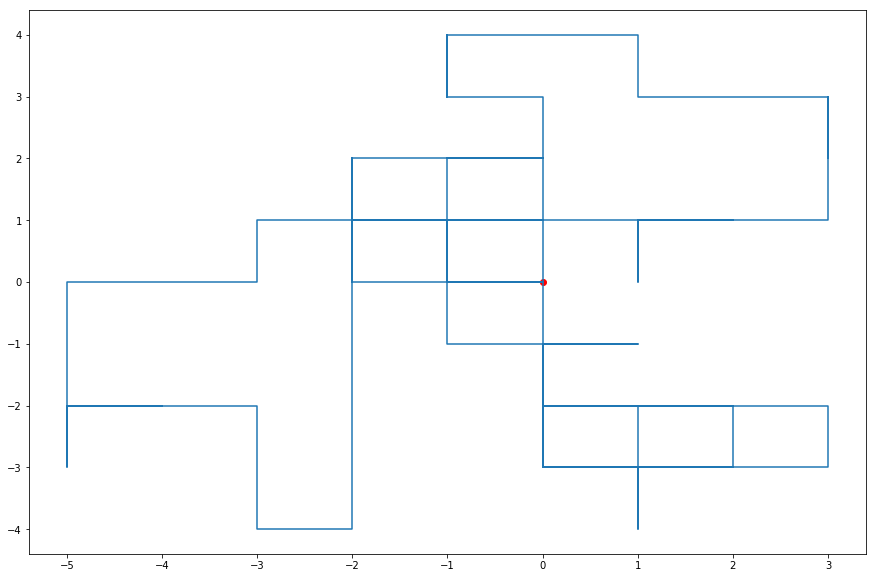

In [253]:
plt.figure(figsize=(15,10))
plt.plot(way[0],way[1] )
plt.scatter(0,0,color = 'red')

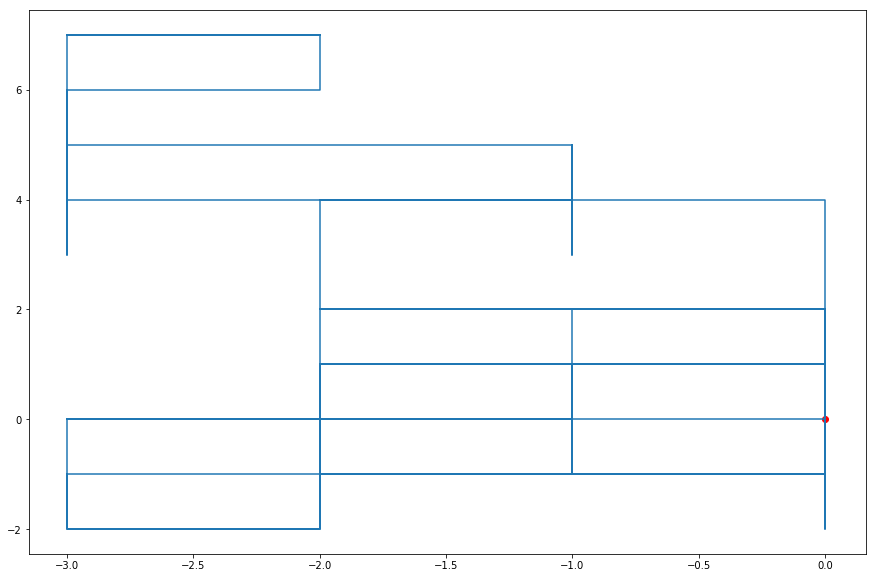

In [251]:
plt.figure(figsize=(15,10))
plt.plot(way[0],way[1] )
plt.scatter(0,0,color = 'red')